In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from scipy.stats import norm
def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Return the value of the polynomial
    return f(x) * 0.05

%matplotlib inline

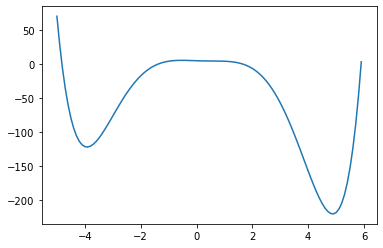

In [9]:
X = np.arange(-5, 6, 0.1)
plt.plot(X,objective(X));
plt.title("Function we want to minimize")

In [85]:
def acquisition1(Xsam, model):
    # calculate mean and stdev via GP
    with catch_warnings():
        #ignore generated warnings
        simplefilter("ignore")
        mu, std = model.predict(Xsam,return_std=True)
        mu = mu[:, 0]
        acq = mu - 10*std
        return acq
    
# def acquisition2(Xsam, model):
#     # calculate mean and stdev via GP
#     with catch_warnings():
#         #ignore generated warnings
#         simplefilter("ignore")
#         best = np.min(y)
#         print('best',best)
#         mu, std = model.predict(Xsam,return_std=True)
#         mu = mu[:, 0]
#         acq = norm.cdf((best-mu) / (std+1E-9))
        
#         return acq
    
# optimize the acquisition function
def opt_acquisition(Xsam, model):
    # calculate the acquisition function for each sample
    scores = acquisition1(Xsam, model)
    # locate the index of the largest scores
    ix = np.argmin(scores)
    #print(ix)
    return Xsam[ix, 0]
 
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    plt.scatter(X, y)
    Xsamples = Xsam.reshape(len(Xsam), 1)
    ysamples = model.predict(Xsamples)
    plt.plot(Xsamples, ysamples)
    # show the plot
    plt.show()
 




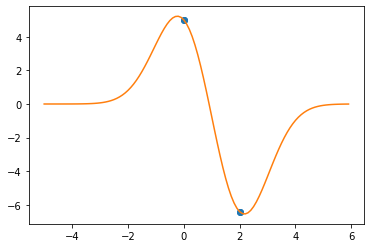

step 1, >x=3.100, f()=-3.887559, actual=-65.104
step 2, >x=3.500, f()=-67.548764, actual=-102.871
step 3, >x=4.100, f()=-124.714531, actual=-167.712
step 4, >x=4.600, f()=-188.439732, actual=-211.106
step 5, >x=4.900, f()=-219.722218, actual=-219.738
step 6, >x=4.900, f()=-219.738429, actual=-219.738
step 7, >x=4.900, f()=-219.738429, actual=-219.738
step 8, >x=4.900, f()=-219.738429, actual=-219.738
step 9, >x=4.900, f()=-219.738429, actual=-219.738
step 10, >x=4.900, f()=-219.738429, actual=-219.738


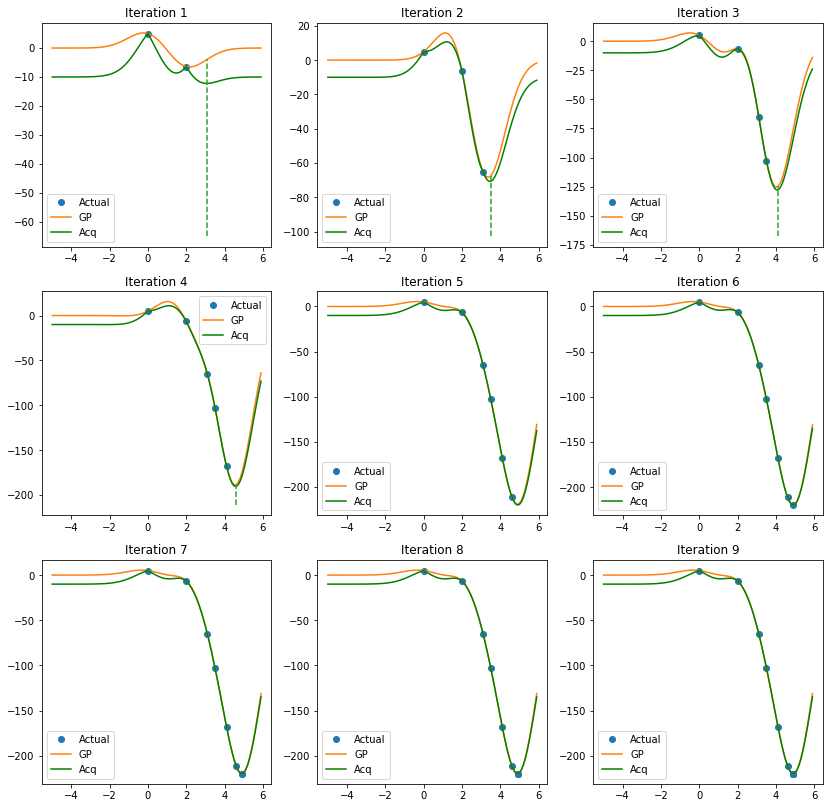

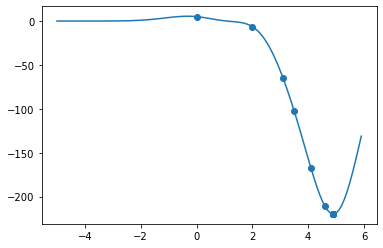

In [86]:
####################
X = np.array([0,2])
y = objective(X)
###Warm up phase####

# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand
plt.plot(X, y,'o')
Xsam = np.arange(-5,6,0.1).reshape((-1,1))
plot(X,y,model)

fig = plt.figure(figsize = (14,14))
# perform the optimization process
with catch_warnings():
        #ignore generated warnings
    simplefilter("ignore")
    for i in range(10):
        # select the next point to sample
        x = opt_acquisition(Xsam, model)
        actual = objective(x)
        est = model.predict(x.reshape((-1,1)))

        if(i<9):
            fig.add_subplot(3,3,i+1)
            plt.title('Iteration %d'% (i+1))
            plt.plot(X,y,'o',label='Actual')
            plt.plot(Xsam,model.predict(Xsam),label='GP')
            plt.plot(Xsam,acquisition1(Xsam,model),'green',label='Acq')
            plt.plot([x,x],[min(actual,est),max(actual,est)],'--')
            plt.legend()
        # sample the point
        # summarize the finding
        print('step %d, >x=%.3f, f()=%3f, actual=%.3f' % (i+1,x, est, actual))
        # add the data to the dataset
        X = np.vstack((X, [[x]]))
        y = np.vstack((y, [[actual]]))

        # update the model
        model.fit(X, y)
        #print(model.predict(Xsam))
    plt.show()
    plot(X, y, model)
# # best result